# Pymaceuticals Inc.
---

### Analysis by Evan Wall 
    

  Mouse # m601 exhibited a notable positive reaction to the drug Capomulin over the study period, leading to a significant reduction in tumor volume compared to mice treated with a placebo. Moreover, the distribution of male and female mice in the study population was evenly balanced, as shown in the pie chart. Additionally, Capomulin and Ramicane were the most commonly prescribed drug regimens in the study.



In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study_combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_study_combined_df.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [39]:
# Checking the number of mice.
total_mice = mouse_study_combined_df['Mouse ID'].nunique()

#display results
total_mice

249

In [40]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

# display results
duplicate_mice_id


array(['g989'], dtype=object)

In [41]:
# Optional: Get all the data for the duplicate mouse ID. 

# Identify duplicate mouse IDs (considering both 'Mouse ID' and 'Timepoint' for duplicates)
duplicate_mice_id_df = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Filter the DataFrame to get all data for those IDs
duplicate_mice_data_df = mouse_study_combined_df[mouse_study_combined_df['Mouse ID'].isin(duplicate_mice_id_df)]

# display results
duplicate_mice_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_combined_df[mouse_study_combined_df["Mouse ID"].isin(duplicate_mice_id_df)==False]

# Display results
mouse_study_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = mouse_study_clean_df['Mouse ID'].nunique()

# Display results
total_mice_clean

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


drug_regimen_mean = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_regimen_median = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_regimen_variance = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_regimen_std = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_regimen_sem = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.

summary_table_df = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_mean, 
     "Median Tumor Volume": drug_regimen_median, 
     "Tumor Volume Variance": drug_regimen_variance, 
     "Tumor Volume Std. Dev.": drug_regimen_std, 
     "Tumor Volume Std. Err.": drug_regimen_sem})

# Display Dataframe
summary_table_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

single_group_by = mouse_study_clean_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line

summary_table_single_line = single_group_by['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

# Display Dataframe
summary_table_single_line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

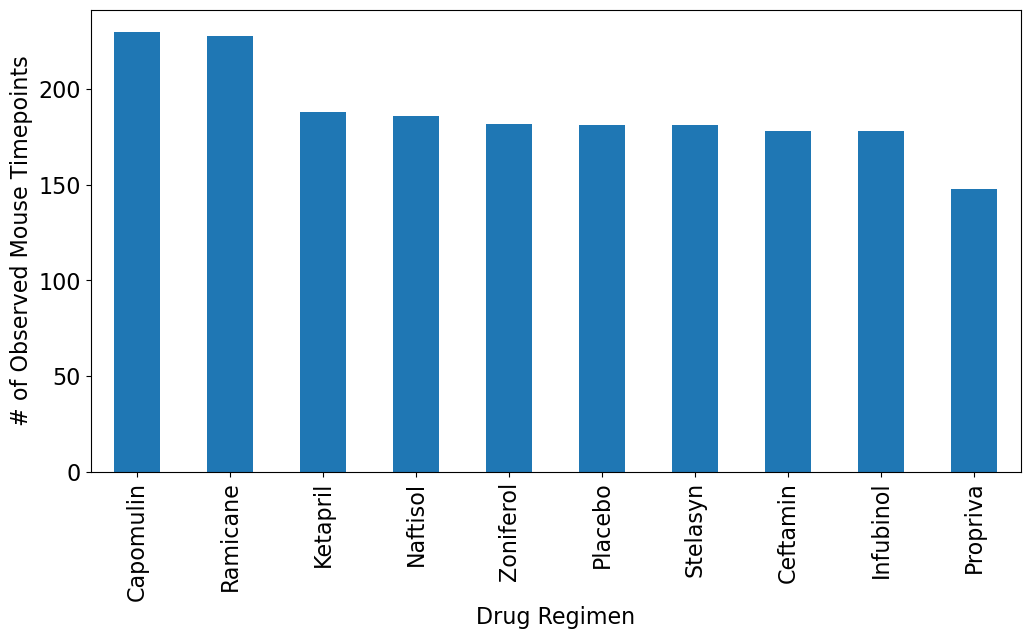

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_timepoints_drugs = mouse_study_clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)

bar_plot_pandas = bar_timepoints_drugs.plot.bar(rot=90, fontsize=16, figsize=(12,6))

plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=16)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Timepoint, dtype: int64

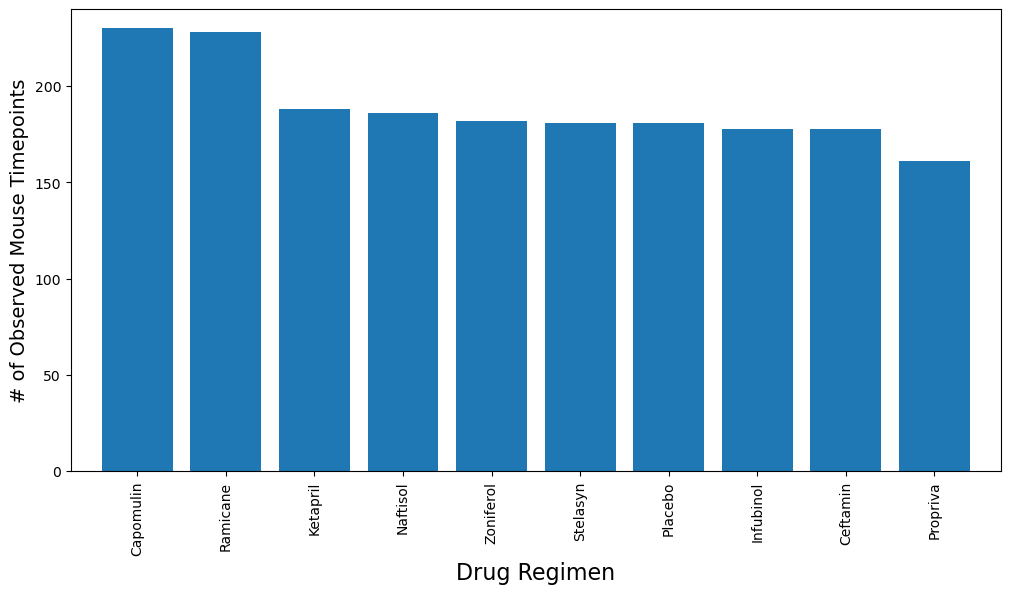

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create an array for timepoints
timepoints_list =(mouse_study_combined_df.groupby(["Drug Regimen"])["Timepoint"].count()).sort_values(ascending=False)
timepoints_list

# Bar pyplot
x_axis = np.arange(len(bar_timepoints_drugs))
fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.bar(x_axis,timepoints_list)
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn',
                            'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoints_list)+10)

plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("# of Observed Mouse Timepoints",fontsize = 14)

timepoints_list


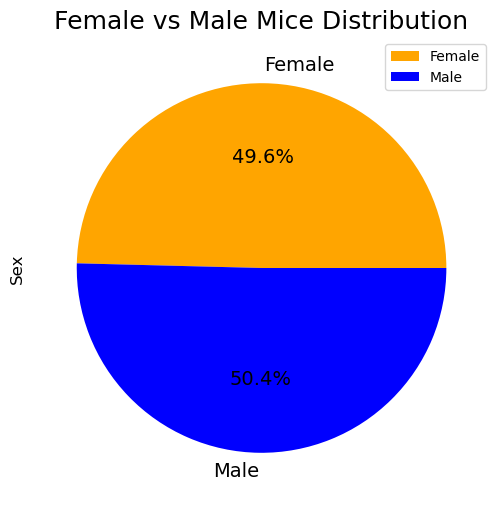

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupedby_gender = mouse_study_clean_df.groupby(["Mouse ID", "Sex"])
groupedby_gender_df = pd.DataFrame(groupedby_gender.size())

mice_gender = pd.DataFrame(groupedby_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

my_colors = ['orange','blue']
m_f_pie_chart_pandas = mice_gender.plot.pie(y="Total Count", 
                                            title= "Female vs Males Mice Distribution", 
                                            fontsize= 14, 
                                            figsize=(6,6),autopct="%1.1f%%",
                                            colors= my_colors)
plt.title('Female vs Male Mice Distribution',fontsize = 18)
plt.ylabel('Sex',fontsize = 12)
plt.show()

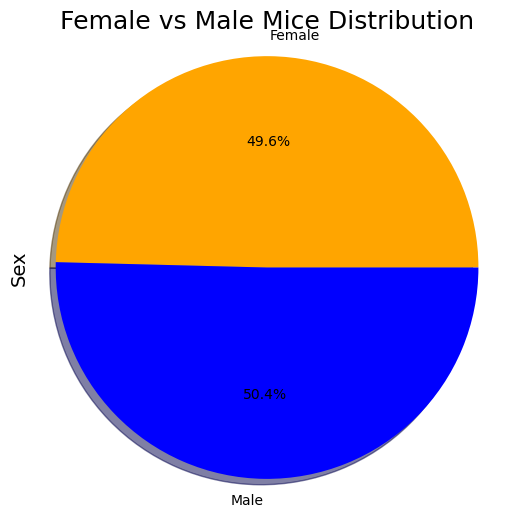

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

total_count_gender = [123,125]

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.pie(total_count_gender,labels=labels, autopct="%1.1f%%", 
        colors= my_colors, shadow= True)
plt.title("Female vs Male Mice Distribution",fontsize = 18)
plt.ylabel("Sex", fontsize = 14)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(mouse_study_clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={"Timepoint": "max_Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.merge(mouse_study_clean_df, last_timepoint_df, on='Mouse ID')

# Display results
final_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [51]:
# Put treatments into a list for for loop (and later for plot labels)

drug_treatments_list = final_timepoint_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in drug_treatments_list:
  subset = final_timepoint_df[final_timepoint_df['Drug Regimen'] == treatment]
  q1 = subset['Tumor Volume (mm3)'].quantile(0.25)
  q3 = subset['Tumor Volume (mm3)'].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
  
  # Print the treatment and the number of outliers
  print(f"Treatment: {treatment}")
  print(f"IQR: {iqr}")
  print(f"Number of outliers: {len(outliers)}")
  print(f"Lower Bound: {(lower_bound)}")
  print(f"Upper Bound: {(upper_bound)}")
  print("------------------------------------------")
  
  # Add tumor volume values to the list for plotting
  tumor_volume_values.append(subset['Tumor Volume (mm3)'].values)

Treatment: Capomulin
IQR: 7.314067135000002
Number of outliers: 2
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025
------------------------------------------
Treatment: Ketapril
IQR: 12.637963814999999
Number of outliers: 0
Lower Bound: 29.27604157
Upper Bound: 79.82789683
------------------------------------------
Treatment: Naftisol
IQR: 12.677160092499996
Number of outliers: 0
Lower Bound: 28.270133771250006
Upper Bound: 78.97877414124999
------------------------------------------
Treatment: Infubinol
IQR: 10.002090667500006
Number of outliers: 0
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001
------------------------------------------
Treatment: Stelasyn
IQR: 10.67215848
Number of outliers: 1
Lower Bound: 32.038901100000004
Upper Bound: 74.72753502
------------------------------------------
Treatment: Ramicane
IQR: 8.325365415
Number of outliers: 1
Lower Bound: 24.1865864625
Upper Bound: 57.488048122500004
------------------------------------------
Treatmen

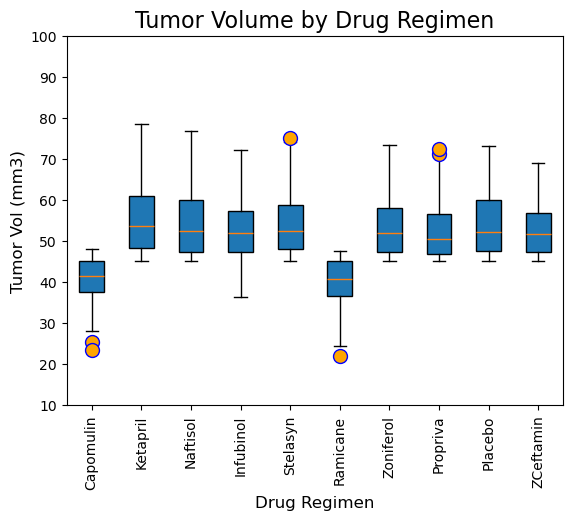

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Show outliers on boxplot for visibility
outlier_design = dict(marker="o", markerfacecolor="orange", markersize=10, markeredgecolor="blue")

# Create Boxplot

plt.boxplot(tumor_volume_values, widths=0.5, patch_artist=True, flierprops=outlier_design)
plt.title('Tumor Volume by Drug Regimen', fontsize= 16)
plt.xlabel('Drug Regimen', fontsize=12) 
plt.ylabel('Tumor Vol (mm3)', fontsize=12)

plt.xticks([1,2,3,4,5,6,7,8,9,10], ['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 
                            'Stelasyn', 'Ramicane', 'Zoniferol', 'Propriva', 
                            'Placebo', 'ZCeftamin'], rotation='vertical')
#plt.xlim(-0.95, len(x_axis)+2)
plt.ylim(10, 100)

plt.show()


## Line and Scatter Plots

(20.0, 50.0)

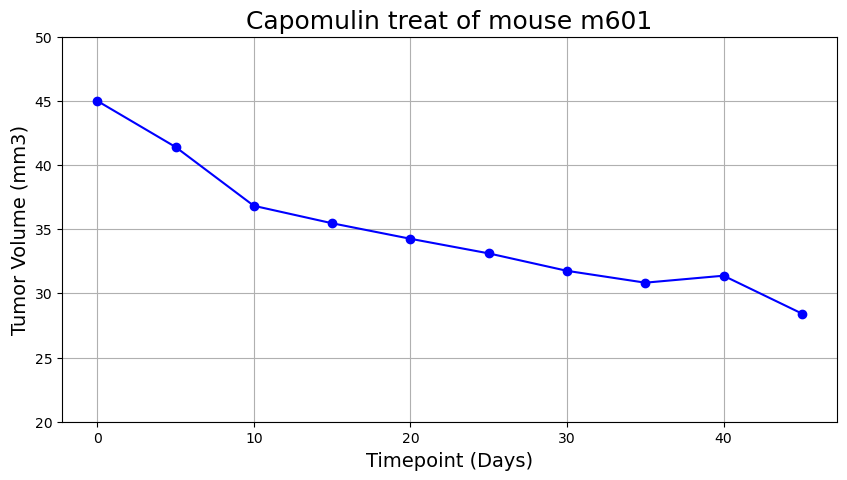

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = mouse_study_combined_df.loc[mouse_study_combined_df["Drug Regimen"] == "Capomulin",:]

cap_line_df = capomulin_df.loc[capomulin_df["Mouse ID"]== "m601",:]

cap_timepoint_x_axis = cap_line_df["Timepoint"]
cap_tumorsize_y_axis = cap_line_df["Tumor Volume (mm3)"]


fig1, axl = plt.subplots(figsize=(10,5))
plt.plot(cap_timepoint_x_axis, cap_tumorsize_y_axis,
        marker="o", color="blue")
plt.title("Capomulin treat of mouse m601", fontsize= 18)
plt.xlabel("Timepoint (Days)", fontsize= 14)
plt.ylabel("Tumor Volume (mm3)", fontsize= 14)
plt.grid(True)
plt.ylim(20, 50)




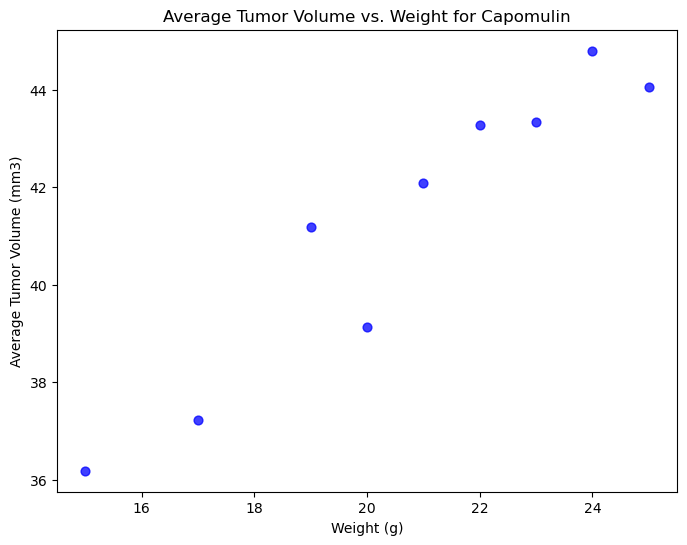

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen



# Calculate average tumor volume per weight group
avg_wgt_tum_vol_cap = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Create the scatter plot
# Set figure size
plt.figure(figsize=(8, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=40, c='blue', alpha=0.75)  

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin')

# Display the plot
plt.show()

avg_wgt_tum_vol_cap 



## Correlation and Regression

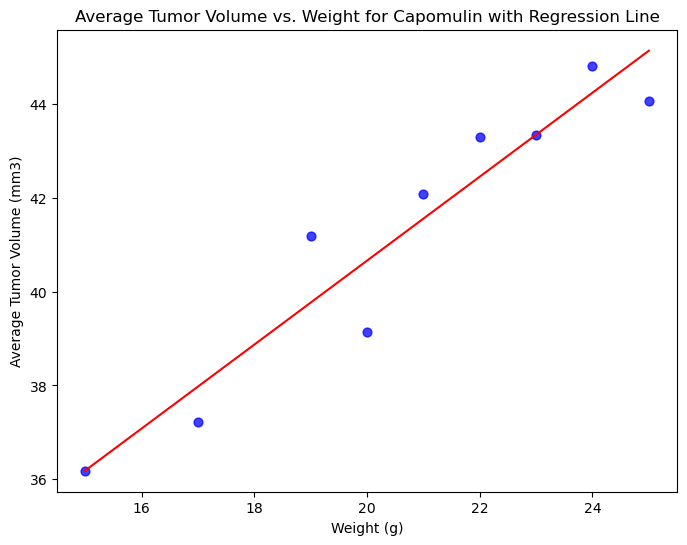

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the linear regression line
m, b = np.polyfit(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, 1)

# Create the scatter plot
plt.figure(figsize=(8, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=40, c='blue', alpha=0.75)
plt.plot(avg_wgt_tum_vol_cap.index, m * avg_wgt_tum_vol_cap.index + b, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin with Regression Line')

# Display the plot
plt.show()